# Tema 4: Naive Bayes
## Cuaderno de ejercicios

**Ejercicio 1**

Con la siguiente tabla de verosimilitud hallar la probabilidad aposterior de que un correo sea correo deseado si contiene la palabra Unsubscribe. 


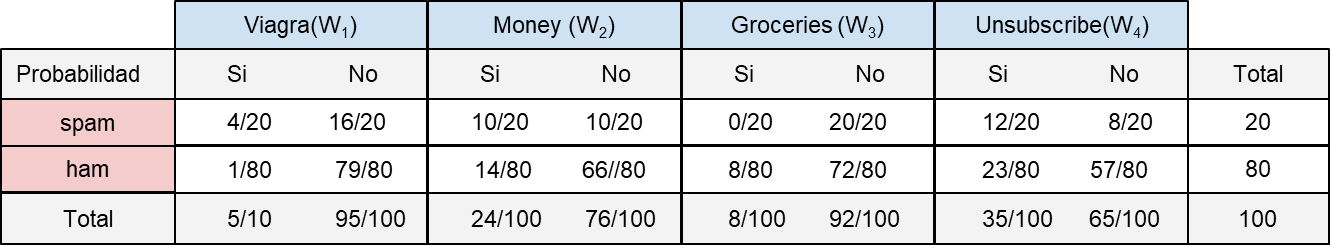

In [1]:
# P( ham |'Unsubscribe' ) = P('Unsubscribe'|ham) ^ P(ham) / P('Unsubscribe')
P_ham = ((23/80)*(80/100)) / (35/100)
print('probabilidad posterior P (ham|unsubscribe): '+str(P_ham))

probabilidad posterior P (ham|unsubscribe): 0.6571428571428571


**Ejercicio 2**

Crear un modelo Naive Bayes con el dataset de iris que se encuentra en la librería de sklearn. El modelo debe predecir la clase de flor. Analice si es un modelo de regresión o de clasificación y aplique las mejores métricas para evaluar el modelo. 

 from sklearn.datasets import load_iris
 
 data = load_iris()


In [1]:
from sklearn.datasets import load_iris

data = load_iris()

In [2]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
y = data.target
X = data.data

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# separamos datos en entrenamiento y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [6]:
y_pred  =  classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [9]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [10]:
ac

0.9666666666666667

In [8]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average=None, 
                                labels=[0, 1, 2])

(array([1.        , 0.92857143, 1.        ]),
 array([1.        , 1.        , 0.83333333]),
 array([1.        , 0.96296296, 0.90909091]),
 array([11, 13,  6], dtype=int64))

**Ejercicio 3**

Crear un modelo Naive Bayes con el dataset de diabetes que se encuentra en la librería de sklearn. El modelo debe predecir la progresión de la enfermedad. Analice si es un modelo de regresión o de clasificación y aplique las mejores métricas para evaluar el modelo. 

diabetes = datasets.load_diabetes()

In [7]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [8]:
X = data.data
y = data.target

In [9]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [13]:
# separamos datos en entrenamiento y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred  =  classifier.predict(X_test)

In [14]:
# métricas de regresion
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

explained_variance_score(y_test, y_pred)

-0.03888975193699595

In [15]:
#Máximo error entre |y-yi|
max_error(y_test, y_pred)

206.0

In [29]:
mean_absolute_error(y_test, y_pred)

57.47191011235955

In [30]:
mean_squared_error(y_test, y_pred)

5327.5842696629215

In [31]:
from sklearn.metrics import median_absolute_error

median_absolute_error(y_test, y_pred)

48.0

Es un dataset para regresion, aplicar un método de clasificación como Naive Bayes, no es una buena opción a pesar de que cumple la condición de que sus características se aproximan con una distribución normal.

**Ejercicio 4**

Tenemos cuatro clientes, conocemos si compró algo o no con base a sus ingresos `(low, médium, high)`.

Usando la regla de Bayes, calcular la probabilidad de que un cliente compre un producto dado que tiene altos ingresos.

| Buy | Income |
| ------------- | ------------- |
| yes | high |
| no | high |
| no | medium |
| yes | low |

In [16]:
# P(buy | high) = P(high | buy) * P(buy) / P(high)
P_bH = ((1/2)*(2/4))/(2/4)

In [17]:
print('probabilidad Pb_H:'+str(P_bH))

probabilidad Pb_H:0.5
